## Name: Shiven Tripathi
## Roll No.: 190816
## Email: shiven@iitk.ac.in

# Problem 2: RME Optimal Policy via Dynamic Programming

In [82]:
!pip install -e .

Obtaining file:///C:/Users/shive/OneDrive/Desktop/Sem%205/CS698/CS698-Deep-Reinforcement-Learning/MIDSEM/midsem
  Attempting uninstall: midsem
    Found existing installation: midsem 0.0.1
    Uninstalling midsem-0.0.1:
      Successfully uninstalled midsem-0.0.1
  Running setup.py develop for midsem


In [2]:
import gym 
import numpy as np
import matplotlib.pyplot as plt

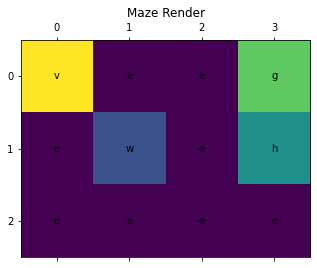

In [3]:
rme = gym.make('midsem.envs:RME-v0')
rme.reset()
rme.render()

In [4]:
def PGen(env):
    '''
    '''
    '''
    self.LEFT = 0
    self.RIGHT = 1
    self.DOWN = 2
    self.UP = 3
    '''
    P = {}
    terminal_states = [env.hole_loc, env.goal_loc]
    for state in range(env.observation_space.n):
        P[state] = {}
        x = state // env.cols
        y = state % env.cols
        for action in range(env.action_space.n):
            P[state][action] = []
            rounded = np.round((1-env.prob)/2,2)
            if action is env.LEFT:
                next_states = [(env.prob,env.movement(0,state)), (rounded,env.movement(2,state)) , (rounded,env.movement(3,state))]
                for prob,next_state in next_states:
                    terminal = False
                    reward = env.step_reward
                    if next_state in terminal_states:
                        terminal = True
                        if next_state == env.goal_loc:
                            reward = env.goal_reward
                        if next_state == env.hole_loc:
                            reward = env.hole_reward
                    P[state][action].append( (prob, next_state, reward, terminal) )
            if action is env.RIGHT:
                next_states = [(env.prob,env.movement(1,state)), (rounded,env.movement(2,state)) , (rounded,env.movement(3,state))]
                for prob,next_state in next_states:
                    terminal = False
                    reward = env.step_reward
                    if next_state in terminal_states:
                        terminal = True
                        if next_state == env.goal_loc:
                            reward = env.goal_reward
                        if next_state == env.hole_loc:
                            reward = env.hole_reward
                    P[state][action].append( (prob, next_state, reward, terminal) )
            if action is env.DOWN:
                next_states = [(env.prob,env.movement(2,state)), (rounded,env.movement(0,state)) , (rounded,env.movement(1,state))]
                for prob,next_state in next_states:
                    terminal = False
                    reward = env.step_reward
                    if next_state in terminal_states:
                        terminal = True
                        if next_state == env.goal_loc:
                            reward = env.goal_reward
                        if next_state == env.hole_loc:
                            reward = env.hole_reward
                    P[state][action].append( (prob, next_state, reward, terminal) )
            if action is env.UP:
                next_states = [(env.prob,env.movement(3,state)), (rounded,env.movement(0,state)) , (rounded,env.movement(1,state))]
                for prob,next_state in next_states:
                    terminal = False
                    reward = env.step_reward
                    if next_state in terminal_states:
                        terminal = True
                        if next_state == env.goal_loc:
                            reward = env.goal_reward
                        if next_state == env.hole_loc:
                            reward = env.hole_reward
                    P[state][action].append( (prob, next_state, reward, terminal) )

    return P

In [5]:
P = PGen(rme)

for key, value in P.items():
    print(key)
    print(value)

0
{0: [(0.8, 0, -0.04, False), (0.1, 4, -0.04, False), (0.1, 0, -0.04, False)], 1: [(0.8, 1, -0.04, False), (0.1, 4, -0.04, False), (0.1, 0, -0.04, False)], 2: [(0.8, 4, -0.04, False), (0.1, 0, -0.04, False), (0.1, 1, -0.04, False)], 3: [(0.8, 0, -0.04, False), (0.1, 0, -0.04, False), (0.1, 1, -0.04, False)]}
1
{0: [(0.8, 0, -0.04, False), (0.1, 1, -0.04, False), (0.1, 1, -0.04, False)], 1: [(0.8, 2, -0.04, False), (0.1, 1, -0.04, False), (0.1, 1, -0.04, False)], 2: [(0.8, 1, -0.04, False), (0.1, 0, -0.04, False), (0.1, 2, -0.04, False)], 3: [(0.8, 1, -0.04, False), (0.1, 0, -0.04, False), (0.1, 2, -0.04, False)]}
2
{0: [(0.8, 1, -0.04, False), (0.1, 6, -0.04, False), (0.1, 2, -0.04, False)], 1: [(0.8, 3, 1, True), (0.1, 6, -0.04, False), (0.1, 2, -0.04, False)], 2: [(0.8, 6, -0.04, False), (0.1, 1, -0.04, False), (0.1, 3, 1, True)], 3: [(0.8, 2, -0.04, False), (0.1, 1, -0.04, False), (0.1, 3, 1, True)]}
3
{0: [(0.8, 2, -0.04, False), (0.1, 7, -1, True), (0.1, 3, 1, True)], 1: [(0.8, 3

In [6]:
def policyEvaluation(env, pi, P, gamma=0.99, theta=10**-1):
    v_old = np.zeros(env.observation_space.n)
    while True:
        v_new = np.zeros(env.observation_space.n)
        for state in range(env.observation_space.n):
            for action in range(env.action_space.n):
                for p,next_state,reward,terminal in P[state][action]:
                    if not terminal:
                        v_new[state] += p * (reward + gamma * v_old[next_state])
                v_new[state] += pi[state] * v_new[state]
        if max(abs(v_new - v_old)) < theta:
            break
        v_old = v_new
    return v_new

In [7]:
def policyImprovement(env, v, P, gamma=0.99):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    pi = np.zeros(env.observation_space.n)

    for state in range(env.observation_space.n):
        for action in range(env.action_space.n):
            for p,next_state,reward,terminal in P[state][action]:
                if not terminal:
                    Q[state][action] += p * (reward + gamma * v[next_state])
    for state in range(env.observation_space.n):
        pi[state] = np.argmax(Q[state])
    return pi

In [8]:
def policyIteration(env, P, gamma=0.99, theta=10**-1):
    pi = np.zeros(env.observation_space.n)
    while True:
        pi_old = pi
        v = policyEvaluation(env, pi, P, gamma, theta)
        pi = policyImprovement(env, v, P, gamma)
        if pi_old is pi:
            return v,pi

In [18]:
v,pi = policyIteration(rme, P, gamma=0.99, theta=10**-5)

C:\Users\shive\AppData\Local\Temp/ipykernel_1192/3145410198.py:10: RuntimeWarning: overflow encountered in double_scalars
  v_new[state] += p * (reward + gamma * v_old[next_state])
C:\Users\shive\AppData\Local\Temp/ipykernel_1192/3145410198.py:11: RuntimeWarning: invalid value encountered in double_scalars
  v_new[state] += pi[state] * v_new[state]


KeyboardInterrupt: 

In [23]:
def valueIteration(env, P, gamma=0.99, theta=10**-2):
    v = np.zeros(env.observation_space.n)
    pi = np.zeros(env.observation_space.n)
    iterations = 0
    while True:
        iterations += 1
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        for state in range(env.observation_space.n):
            for action in range(env.action_space.n):
                for p,next_state,reward,terminal in P[state][action]:
                    if not terminal:
                        Q[state][action] += p * (reward + gamma * v[next_state])
        if max(np.abs(v-np.max(Q,axis=1))) < theta:
            print("Converged in:", iterations, "iterations")
            break
        v = np.max(Q, axis=1)
        for state in range(env.observation_space.n):
            pi[state] = np.argmax(Q[state])

    return v,pi

In [25]:
v,pi = valueIteration(rme, P, gamma=0.99, theta=10**-8)

Converged in: 23 iterations


In [26]:
print(v,pi)

[-0.11536791 -0.06026492 -0.01052079  0.         -0.16380471 -0.0685644
 -0.01494177 -0.00547923 -0.15797005 -0.10873024 -0.05959805 -0.01542753] [1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 1. 3.]


[[1. 1. 1. 1.]
 [3. 1. 1. 3.]
 [1. 1. 1. 3.]]
[[-0.11536791 -0.06026492 -0.01052079  0.        ]
 [-0.16380471 -0.0685644  -0.01494177 -0.00547923]
 [-0.15797005 -0.10873024 -0.05959805 -0.01542753]]


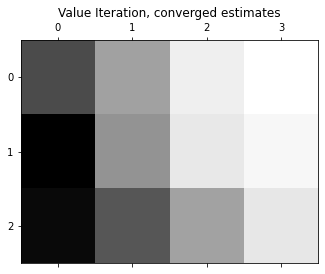

In [29]:
print(np.reshape(pi,(3,4)))
print(np.reshape(v,(3,4)))
plt.matshow(np.reshape(v,(3,4)),cmap='gray')
plt.title("Value Iteration, converged estimates")
plt.show()

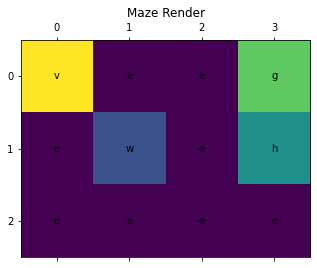

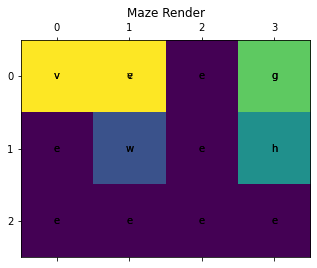

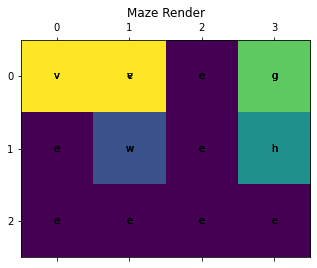

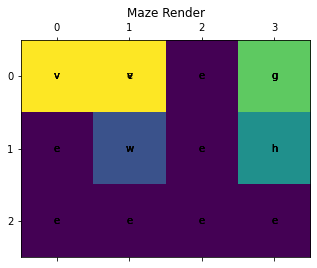

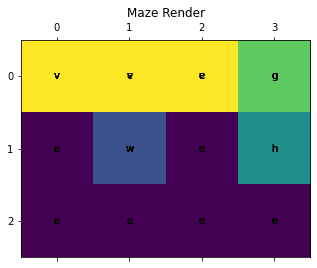

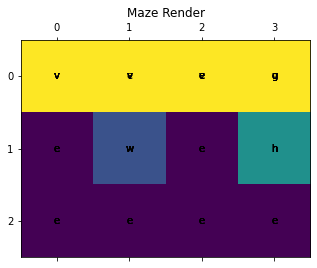

In [31]:
rme.reset()
s = rme.state
terminal = False

while not terminal:
    rme.render()
    a = pi[s]
    s_, r, terminal,_ = rme.step(a)
    s = s_
rme.render()